Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 89 images belonging to 2 classes.
Found 89 images belonging to 2 classes.


Epoch 1/30
5/5 [==============================] - 7s 1s/step - loss: 6.7323 - accuracy: 0.6000 - val_loss: 1.8488 - val_accuracy: 0.5393
Epoch 2/30
5/5 [==============================] - 5s 1s/step - loss: 1.6390 - accuracy: 0.2667 - val_loss: 0.6834 - val_accuracy: 0.7416
Epoch 3/30
5/5 [==============================] - 5s 1s/step - loss: 0.7628 - accuracy: 0.5333 - val_loss: 0.6861 - val_accuracy: 0.4607
Epoch 4/30
5/5 [==============================] - 6s 1s/step - loss: 0.7633 - accuracy: 0.3333 - val_loss: 0.6866 - val_accuracy: 0.4719
Epoch 5/30
5/5 [==============================] - 8s 2s/step - loss: 0.8309 - accuracy: 0.6667 - val_loss: 0.6811 - val_accuracy: 0.7753
Epoch 6/30
5/5 [==============================] - 5s 1s/step - loss: 0.7089 - accuracy: 0.4667 - val_loss: 0.6808 - val_accuracy: 0.4831
Epoch 7/30
5/5 [==============================] - 7s 2s/step - loss: 0.6879 - accuracy: 0.4000 - val_loss: 0.6684 - val_accuracy: 0.7978
Epoch 8/30
5/5 [=========================

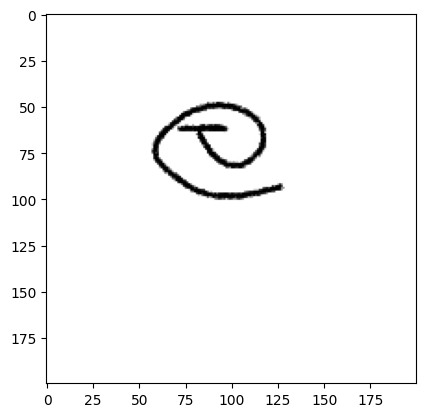

1/1 [==============================] - 0s 92ms/step
This is Letter 'La' in Sinhala


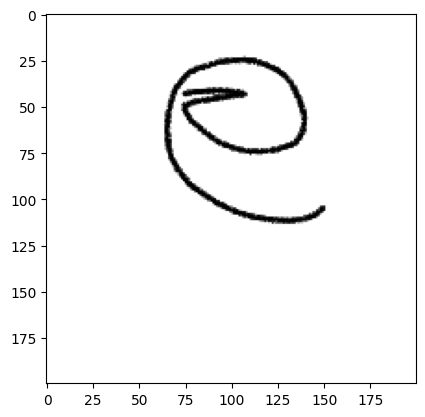

1/1 [==============================] - 0s 58ms/step
This is Letter 'La' in Sinhala


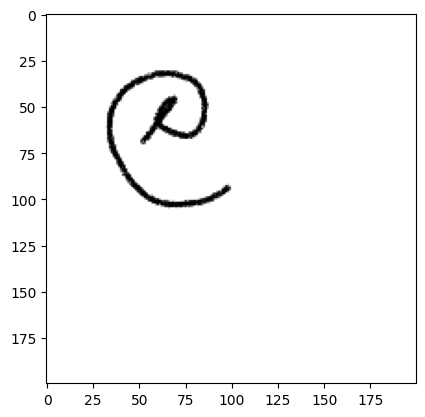

1/1 [==============================] - 0s 58ms/step
This is 'Letter' 'Aa' in Sinhala


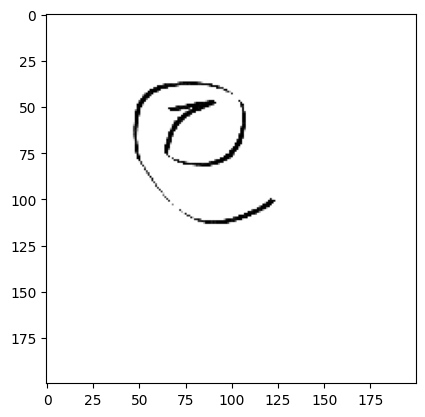

1/1 [==============================] - 0s 50ms/step
This is 'Letter' 'Aa' in Sinhala


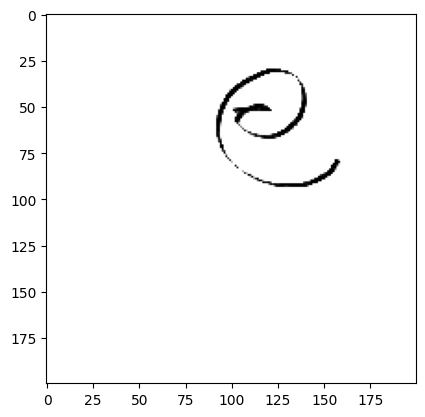

1/1 [==============================] - 0s 49ms/step
This is Letter 'La' in Sinhala


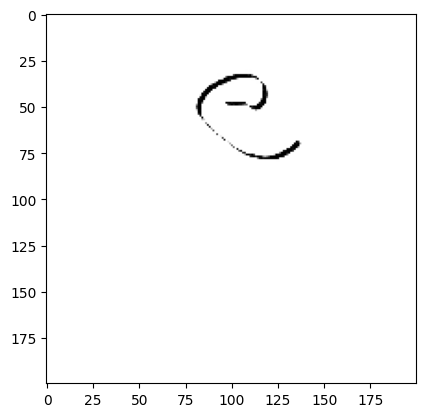

1/1 [==============================] - 0s 56ms/step
This is Letter 'La' in Sinhala


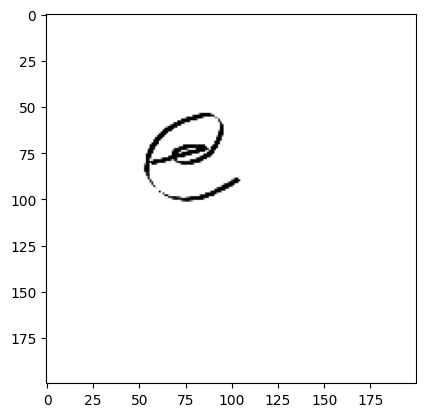

1/1 [==============================] - 0s 70ms/step
This is Letter 'La' in Sinhala


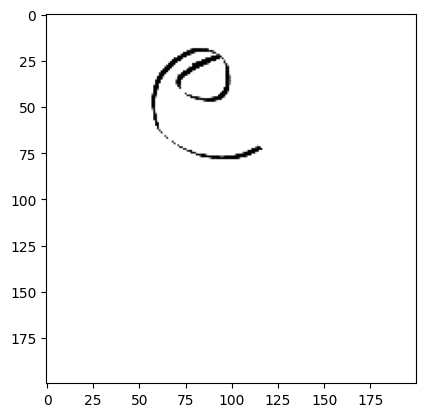

1/1 [==============================] - 0s 53ms/step
This is 'Letter' 'Aa' in Sinhala


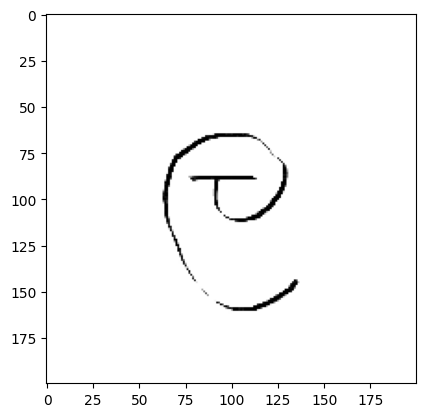

1/1 [==============================] - 0s 48ms/step
This is Letter 'La' in Sinhala


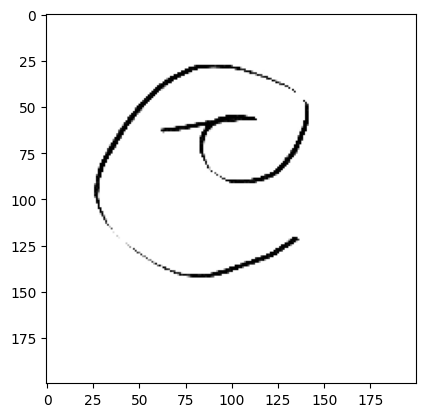

1/1 [==============================] - 0s 35ms/step
This is Letter 'La' in Sinhala


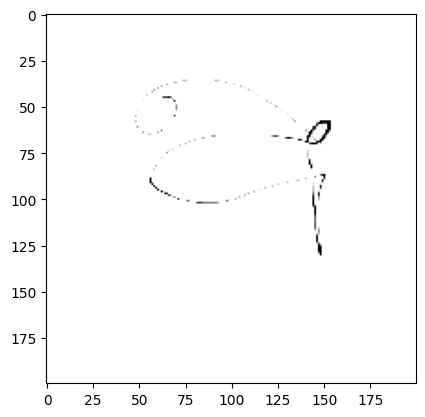

1/1 [==============================] - 0s 37ms/step
This is Letter 'La' in Sinhala


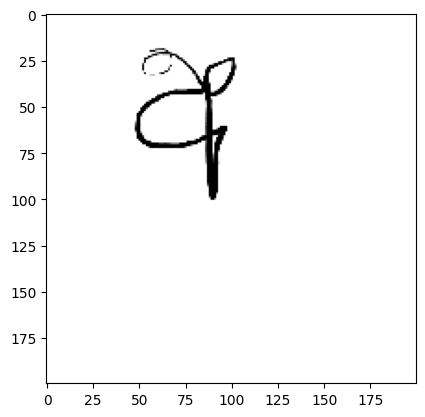

1/1 [==============================] - 0s 46ms/step
This is 'Letter' 'Aa' in Sinhala


1/1 [==============================] - 0s 35ms/step
This is Letter 'La' in Sinhala


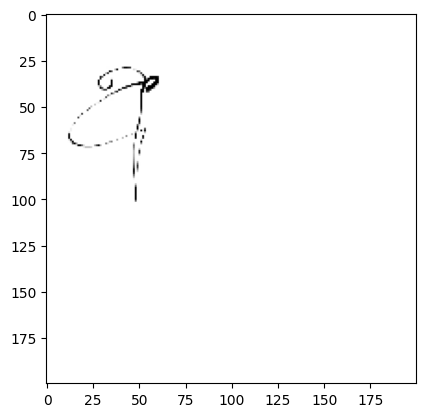

1/1 [==============================] - 0s 35ms/step
This is 'Letter' 'Aa' in Sinhala


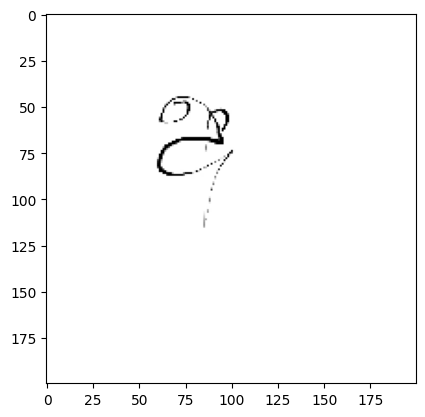

1/1 [==============================] - 0s 45ms/step
This is Letter 'La' in Sinhala


1/1 [==============================] - 0s 36ms/step
This is 'Letter' 'Aa' in Sinhala


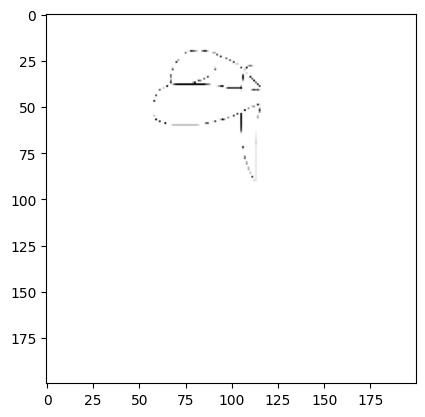

1/1 [==============================] - 0s 40ms/step
This is 'Letter' 'Aa' in Sinhala


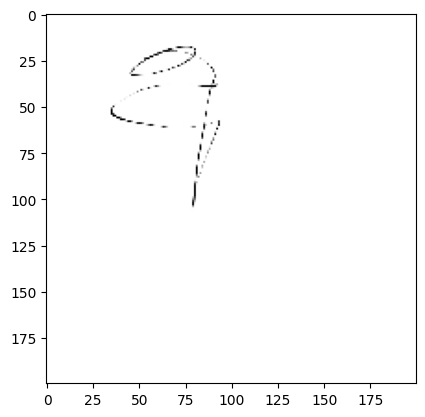

1/1 [==============================] - 0s 47ms/step
This is 'Letter' 'Aa' in Sinhala


1/1 [==============================] - 0s 35ms/step
This is Letter 'La' in Sinhala


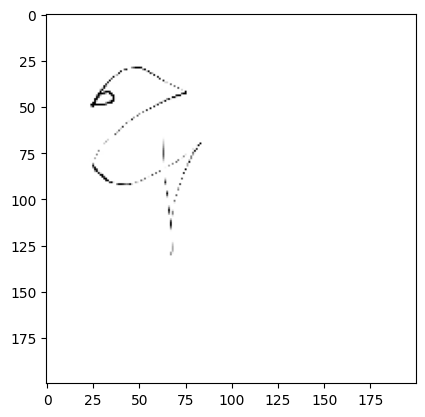

1/1 [==============================] - 0s 37ms/step
This is 'Letter' 'Aa' in Sinhala


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

from google.colab import drive
drive.mount('/content/drive')

os.chdir("/content/drive/My Drive/PS-2019-302(MINI PROJECT)/")
os.getcwd()

img = image.load_img("/content/drive/MyDrive/PS-2019-302(MINI PROJECT)/Training/letter a/letterAa_train.jpeg")

plt.imshow(img)

cv2.imread("/content/drive/MyDrive/PS-2019-302(MINI PROJECT)/Training/letter a/letterAa_train.jpeg").shape

train = ImageDataGenerator(rescale = 1/255)

validation = ImageDataGenerator(rescale = 1/255)

train_dataset = train.flow_from_directory('Training/',
                                          target_size = (200,200),
                                          batch_size = 3,
                                          class_mode = 'binary')

validation_dataset = validation.flow_from_directory('Validation/',
                                                   target_size = (200,200),
                                                   batch_size = 3,
                                                   class_mode = 'binary')

train_dataset.class_indices

train_dataset.classes

model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (200,200,3)),
                                   # MaxPooling layer with pool size (2, 2)
                                    tf.keras.layers.MaxPool2D(2,2),
                                   # Convolutional layer with 32 filters, each of size (3, 3), and ReLU activation
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                   # Convolutional layer with 64 filters, each of size (3, 3), and ReLU activation
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                   # Flatten layer to convert 3D feature maps to 1D feature vectors
                                    tf.keras.layers.Flatten(),
                                   # Dense (fully connected) layer with 512 units and ReLU activation
                                    tf.keras.layers.Dense(512,activation = 'relu'),
                                   # Output layer with 1 unit and sigmoid activation for binary classification
                                    tf.keras.layers.Dense(1,activation = 'sigmoid')
                                    ])

model.compile(loss = 'binary_crossentropy',
              optimizer = RMSprop(lr=0.001),
              metrics = ['accuracy'])



model_fit = model.fit(train_dataset,
                      steps_per_epoch = 5,
                      epochs = 30,
                      validation_data = validation_dataset)


validation_dataset.class_indices

dir_path = 'Testing/'

for i in os.listdir(dir_path):
    # Load the image and resize it to the target size
  img = image.load_img(dir_path+ i,target_size=(200,200))
  # Display the image using matplotlib
  plt.imshow(img)
  plt.show()

  # Convert the image to a NumPy array and add an extra dimension
  X = image.img_to_array(img)
  X = np.expand_dims(X,axis = 0)
# Stack the array vertically to create a batch of images
  images = np.vstack([X])
# Make a prediction using the trained model
  val = model.predict(images)
# Check the predicted value and print the corresponding class label
  if val == 0:
    print("This is 'Letter' 'Aa' in Sinhala")
  else:
    print("This is Letter 'La' in Sinhala")


